In [ ]:
import pandas as pd
import numpy as np
import os

In [27]:
%run sqlite_execution.py
db_handler = Sqlite_Handler()
# db_handler.drop_duplicates()
info = db_handler.get_info()
info

Found 8333 images in database
Found 7741 images in database after removing non existing images
Found 497 duplicates in database
Removed 497 duplicates from database


,total,solved,unsolved
flower,1670,464,1206
car,1493,359,1134
motorcycle,1335,309,1026
laptop,1120,303,817
bonsai tree,623,300,323
tree,393,294,99
helicopter,242,242,0
cup of orange juice,166,166,0
goose,56,42,14
cat,9,0,9


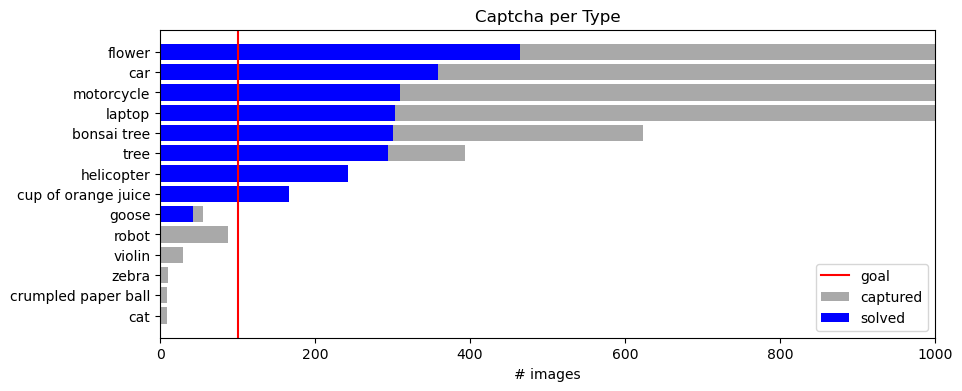

In [28]:
%run visualizer.py
plot_captcha_info(info, figsize=(4,10))

In [29]:
%run pytorch_training.py
train_model_on_captcha_string(db_handler, save=True)
# train_models_on_all_captcha_strings(db_handler, threshold=100)

Training model on flower...
x shape: (464, 3, 128, 128)
y shape: (464, 1)
train size: 348, test size: 116
single element shape: torch.Size([3, 128, 128])
Epoch: 1, Test Loss: 0.0044, Accuracy: 91/116, 78.45%
Epoch: 2, Test Loss: 0.0041, Accuracy: 91/116, 78.45%
Epoch: 3, Test Loss: 0.0036, Accuracy: 91/116, 78.45%
Epoch: 4, Test Loss: 0.0025, Accuracy: 104/116, 89.66%
Epoch: 5, Test Loss: 0.0023, Accuracy: 109/116, 93.97%
Epoch: 6, Test Loss: 0.0015, Accuracy: 110/116, 94.83%
Epoch: 7, Test Loss: 0.0014, Accuracy: 110/116, 94.83%
Epoch: 8, Test Loss: 0.0011, Accuracy: 112/116, 96.55%
Epoch: 9, Test Loss: 0.0011, Accuracy: 109/116, 93.97%
Epoch: 10, Test Loss: 0.0012, Accuracy: 110/116, 94.83%
Epoch: 11, Test Loss: 0.0009, Accuracy: 111/116, 95.69%
Epoch: 12, Test Loss: 0.0009, Accuracy: 112/116, 96.55%
Epoch: 13, Test Loss: 0.0009, Accuracy: 112/116, 96.55%
Epoch: 14, Test Loss: 0.0010, Accuracy: 113/116, 97.41%
Epoch: 15, Test Loss: 0.0018, Accuracy: 108/116, 93.10%
Epoch: 16, Test Lo

In [ ]:
%run pytorch_training.py
test_models_on_all_captcha_strings(db_handler)

In [ ]:
%run collector/collector.py
urls = [
    "https://nopecha.com/demo/hcaptcha",
    "https://democaptcha.com/demo-form-eng/hcaptcha.html",
    "https://freebitco.in/signup/?op=s", 
    "https://accounts.shopify.com/signup?rid=f8d4b2e6-f0fe-41ab-83e5-e633974bd42b&signup_strategy=password",
    "https://www.dierenkliniekoudorp.nl/",
    "https://cellar335.com/",
    "https://www.salumificiovecchi.it/",
    "https://economygarages.com/",
    "https://www.assimilationdesigns.com/"
    "https://raleighvehiclewraps.com/"
    ]
collect_data(db_handler, urls[0], count=100, collect_v2=False)

In [ ]:
assert 1 == 0 # to avoid execution of code below

In [23]:
%run manual_classifier.py
mc = Manual_Classifier(db_handler)

Setting images for car
Setting images for cup of orange juice
labeled /cup of orange juice/11-17-27-02-003578_0.png as False
labeled /cup of orange juice/11-17-27-02-003578_1.png as False
labeled /cup of orange juice/11-17-27-02-003578_2.png as False
labeled /cup of orange juice/11-17-27-02-003578_3.png as True
labeled /cup of orange juice/11-17-27-02-003578_4.png as False
labeled /cup of orange juice/11-17-27-02-003578_5.png as True
labeled /cup of orange juice/11-17-27-02-003578_6.png as False
labeled /cup of orange juice/11-17-27-02-003578_7.png as True
labeled /cup of orange juice/11-17-27-02-003578_8.png as True
Setting images for cup of orange juice
labeled /cup of orange juice/11-17-27-34-603003_0.png as False
labeled /cup of orange juice/11-17-27-34-603003_1.png as False
labeled /cup of orange juice/11-17-27-34-603003_2.png as False
labeled /cup of orange juice/11-17-27-34-603003_3.png as True
labeled /cup of orange juice/11-17-27-34-603003_4.png as True
labeled /cup of orange 

C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-27-37-182769_0.png as False
labeled /cup of orange juice/11-17-27-37-182769_1.png as True
labeled /cup of orange juice/11-17-27-37-182769_2.png as False
labeled /cup of orange juice/11-17-27-37-182769_3.png as False
labeled /cup of orange juice/11-17-27-37-182769_4.png as True
labeled /cup of orange juice/11-17-27-37-182769_5.png as True
labeled /cup of orange juice/11-17-27-37-182769_6.png as True
labeled /cup of orange juice/11-17-27-37-182769_7.png as True
labeled /cup of orange juice/11-17-27-37-182769_8.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-27-56-977027_0.png as False
labeled /cup of orange juice/11-17-27-56-977027_1.png as True
labeled /cup of orange juice/11-17-27-56-977027_2.png as True
labeled /cup of orange juice/11-17-27-56-977027_3.png as False
labeled /cup of orange juice/11-17-27-56-977027_4.png as False
labeled /cup of orange juice/11-17-27-56-977027_5.png as False
labeled /cup of orange juice/11-17-27-56-977027_6.png as False
labeled /cup of orange juice/11-17-27-56-977027_7.png as False
labeled /cup of orange juice/11-17-27-56-977027_8.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-28-07-589112_0.png as False
labeled /cup of orange juice/11-17-28-07-589112_1.png as False
labeled /cup of orange juice/11-17-28-07-589112_2.png as False
labeled /cup of orange juice/11-17-28-07-589112_3.png as True
labeled /cup of orange juice/11-17-28-07-589112_4.png as True
labeled /cup of orange juice/11-17-28-07-589112_5.png as False
labeled /cup of orange juice/11-17-28-07-589112_6.png as True
labeled /cup of orange juice/11-17-28-07-589112_7.png as True
labeled /cup of orange juice/11-17-28-07-589112_8.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-28-59-617886_0.png as False
labeled /cup of orange juice/11-17-28-59-617886_1.png as True
labeled /cup of orange juice/11-17-28-59-617886_2.png as True
labeled /cup of orange juice/11-17-28-59-617886_3.png as True
labeled /cup of orange juice/11-17-28-59-617886_4.png as False
labeled /cup of orange juice/11-17-28-59-617886_5.png as False
labeled /cup of orange juice/11-17-28-59-617886_6.png as True
labeled /cup of orange juice/11-17-28-59-617886_7.png as False
labeled /cup of orange juice/11-17-28-59-617886_8.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-29-14-848683_0.png as True
labeled /cup of orange juice/11-17-29-14-848683_1.png as False
labeled /cup of orange juice/11-17-29-14-848683_2.png as False
labeled /cup of orange juice/11-17-29-14-848683_3.png as True
labeled /cup of orange juice/11-17-29-14-848683_4.png as True
labeled /cup of orange juice/11-17-29-14-848683_5.png as False
labeled /cup of orange juice/11-17-29-14-848683_6.png as False
labeled /cup of orange juice/11-17-29-14-848683_7.png as False
labeled /cup of orange juice/11-17-29-14-848683_8.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-30-15-362182_0.png as True
labeled /cup of orange juice/11-17-30-15-362182_1.png as False
labeled /cup of orange juice/11-17-30-15-362182_2.png as False
labeled /cup of orange juice/11-17-30-15-362182_3.png as True
labeled /cup of orange juice/11-17-30-15-362182_4.png as False
labeled /cup of orange juice/11-17-30-15-362182_5.png as True
labeled /cup of orange juice/11-17-30-15-362182_6.png as True
labeled /cup of orange juice/11-17-30-42-448706_0.png as False
labeled /cup of orange juice/11-17-30-42-448706_1.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-30-42-448706_2.png as False
labeled /cup of orange juice/11-17-30-42-448706_3.png as True
labeled /cup of orange juice/11-17-30-42-448706_4.png as True
labeled /cup of orange juice/11-17-30-42-448706_5.png as True
labeled /cup of orange juice/11-17-30-42-448706_6.png as False
labeled /cup of orange juice/11-17-30-42-448706_7.png as True
labeled /cup of orange juice/11-17-30-42-448706_8.png as True
labeled /cup of orange juice/11-17-30-50-095047_0.png as False
labeled /cup of orange juice/11-17-30-50-095047_1.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-30-50-095047_2.png as True
labeled /cup of orange juice/11-17-30-50-095047_3.png as False
labeled /cup of orange juice/11-17-30-50-095047_4.png as True
labeled /cup of orange juice/11-17-30-50-095047_5.png as False
labeled /cup of orange juice/11-17-30-50-095047_6.png as False
labeled /cup of orange juice/11-17-30-50-095047_7.png as False
labeled /cup of orange juice/11-17-30-50-095047_8.png as False
labeled /cup of orange juice/11-17-32-01-909994_0.png as False
labeled /cup of orange juice/11-17-32-01-909994_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-32-01-909994_2.png as False
labeled /cup of orange juice/11-17-32-01-909994_3.png as False
labeled /cup of orange juice/11-17-32-01-909994_4.png as False
labeled /cup of orange juice/11-17-32-01-909994_5.png as True
labeled /cup of orange juice/11-17-32-01-909994_6.png as True
labeled /cup of orange juice/11-17-32-01-909994_7.png as True
labeled /cup of orange juice/11-17-32-01-909994_8.png as True
labeled /cup of orange juice/11-17-32-02-749616_0.png as False
labeled /cup of orange juice/11-17-32-02-749616_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-32-02-749616_2.png as False
labeled /cup of orange juice/11-17-32-02-749616_3.png as False
labeled /cup of orange juice/11-17-32-02-749616_4.png as False
labeled /cup of orange juice/11-17-32-02-749616_5.png as True
labeled /cup of orange juice/11-17-32-02-749616_6.png as True
labeled /cup of orange juice/11-17-32-02-749616_7.png as True
labeled /cup of orange juice/11-17-32-02-749616_8.png as True
labeled /cup of orange juice/11-17-32-03-627890_0.png as False
labeled /cup of orange juice/11-17-32-03-627890_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-32-03-627890_2.png as True
labeled /cup of orange juice/11-17-32-03-627890_3.png as True
labeled /cup of orange juice/11-17-32-03-627890_4.png as False
labeled /cup of orange juice/11-17-32-03-627890_5.png as False
labeled /cup of orange juice/11-17-32-03-627890_6.png as False
labeled /cup of orange juice/11-17-32-03-627890_7.png as False
labeled /cup of orange juice/11-17-32-03-627890_8.png as True
labeled /cup of orange juice/11-17-32-20-778990_0.png as True
labeled /cup of orange juice/11-17-32-20-778990_1.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-32-20-778990_2.png as True
labeled /cup of orange juice/11-17-32-20-778990_3.png as False
labeled /cup of orange juice/11-17-32-20-778990_4.png as False
labeled /cup of orange juice/11-17-32-20-778990_5.png as False
labeled /cup of orange juice/11-17-32-20-778990_6.png as False
labeled /cup of orange juice/11-17-32-20-778990_7.png as True
labeled /cup of orange juice/11-17-32-20-778990_8.png as False
labeled /cup of orange juice/11-17-32-31-493478_0.png as False
labeled /cup of orange juice/11-17-32-31-493478_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-32-31-493478_2.png as False
labeled /cup of orange juice/11-17-32-31-493478_3.png as False
labeled /cup of orange juice/11-17-32-31-493478_4.png as True
labeled /cup of orange juice/11-17-32-31-493478_5.png as True
labeled /cup of orange juice/11-17-32-31-493478_6.png as False
labeled /cup of orange juice/11-17-32-31-493478_7.png as False
labeled /cup of orange juice/11-17-32-31-493478_8.png as True
labeled /cup of orange juice/11-17-32-34-064924_0.png as False
labeled /cup of orange juice/11-17-32-34-064924_1.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-32-34-064924_2.png as False
labeled /cup of orange juice/11-17-32-34-064924_3.png as True
labeled /cup of orange juice/11-17-32-34-064924_4.png as False
labeled /cup of orange juice/11-17-32-34-064924_5.png as False
labeled /cup of orange juice/11-17-32-34-064924_6.png as True
labeled /cup of orange juice/11-17-35-45-240113_0.png as False
labeled /cup of orange juice/11-17-35-45-240113_1.png as True
labeled /cup of orange juice/11-17-35-45-240113_2.png as True
labeled /cup of orange juice/11-17-35-45-240113_3.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-35-45-240113_4.png as False
labeled /cup of orange juice/11-17-35-45-240113_5.png as False
labeled /cup of orange juice/11-17-35-45-240113_6.png as False
labeled /cup of orange juice/11-17-35-45-240113_7.png as False
labeled /cup of orange juice/11-17-35-45-240113_8.png as True
labeled /cup of orange juice/11-17-35-57-127869_0.png as False
labeled /cup of orange juice/11-17-35-57-127869_1.png as False
labeled /cup of orange juice/11-17-35-57-127869_2.png as True
labeled /cup of orange juice/11-17-35-57-127869_3.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-35-57-127869_4.png as False
labeled /cup of orange juice/11-17-35-57-127869_5.png as False
labeled /cup of orange juice/11-17-35-57-127869_6.png as True
labeled /cup of orange juice/11-17-36-53-008542_0.png as False
labeled /cup of orange juice/11-17-36-53-008542_1.png as False
labeled /cup of orange juice/11-17-36-53-008542_2.png as False
labeled /cup of orange juice/11-17-36-53-008542_3.png as False
labeled /cup of orange juice/11-17-36-53-008542_4.png as True
labeled /cup of orange juice/11-17-36-53-008542_5.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-36-53-008542_6.png as True
labeled /cup of orange juice/11-17-36-53-008542_7.png as True
labeled /cup of orange juice/11-17-36-53-008542_8.png as False
labeled /cup of orange juice/11-17-37-52-545661_0.png as True
labeled /cup of orange juice/11-17-37-52-545661_1.png as False
labeled /cup of orange juice/11-17-37-52-545661_2.png as True
labeled /cup of orange juice/11-17-37-52-545661_3.png as False
labeled /cup of orange juice/11-17-37-52-545661_4.png as True
labeled /cup of orange juice/11-17-38-00-663152_0.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-38-00-663152_1.png as False
labeled /cup of orange juice/11-17-38-00-663152_2.png as False
labeled /cup of orange juice/11-17-38-00-663152_3.png as True
labeled /cup of orange juice/11-17-38-00-663152_4.png as True
labeled /cup of orange juice/11-17-38-00-663152_5.png as False
labeled /cup of orange juice/11-17-38-00-663152_6.png as False
labeled /cup of orange juice/11-17-38-00-663152_7.png as True
labeled /cup of orange juice/11-17-38-00-663152_8.png as True
labeled /cup of orange juice/11-17-38-11-878981_0.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-38-11-878981_1.png as False
labeled /cup of orange juice/11-17-38-11-878981_2.png as False
labeled /cup of orange juice/11-17-38-11-878981_3.png as True
labeled /cup of orange juice/11-17-38-11-878981_4.png as False
labeled /cup of orange juice/11-17-38-11-878981_5.png as True
labeled /cup of orange juice/11-17-38-11-878981_6.png as False
labeled /cup of orange juice/11-17-38-30-648420_0.png as True
labeled /cup of orange juice/11-17-38-30-648420_1.png as False
labeled /cup of orange juice/11-17-38-30-648420_2.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-38-30-648420_3.png as False
labeled /cup of orange juice/11-17-38-30-648420_4.png as False
labeled /cup of orange juice/11-17-38-30-648420_5.png as False
labeled /cup of orange juice/11-17-38-39-551229_0.png as False
labeled /cup of orange juice/11-17-38-39-551229_1.png as True
labeled /cup of orange juice/11-17-38-39-551229_2.png as True
labeled /cup of orange juice/11-17-38-39-551229_3.png as True
labeled /cup of orange juice/11-17-38-39-551229_4.png as False
labeled /cup of orange juice/11-17-38-39-551229_5.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-38-39-551229_6.png as False
labeled /cup of orange juice/11-17-38-39-551229_7.png as False
labeled /cup of orange juice/11-17-38-39-551229_8.png as True
labeled /cup of orange juice/11-17-39-47-195353_0.png as True
labeled /cup of orange juice/11-17-39-47-195353_1.png as True
labeled /cup of orange juice/11-17-39-47-195353_2.png as True
labeled /cup of orange juice/11-17-39-47-195353_3.png as True
labeled /cup of orange juice/11-17-39-47-195353_4.png as False
labeled /cup of orange juice/11-17-39-47-195353_5.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-39-47-195353_6.png as True
labeled /cup of orange juice/11-17-39-47-195353_7.png as False
labeled /cup of orange juice/11-17-39-47-195353_8.png as True
labeled /cup of orange juice/11-17-40-04-200424_0.png as False
labeled /cup of orange juice/11-17-40-04-200424_1.png as True
labeled /cup of orange juice/11-17-40-04-200424_2.png as False
labeled /cup of orange juice/11-17-40-04-200424_3.png as False
labeled /cup of orange juice/11-17-40-04-200424_4.png as False
labeled /cup of orange juice/11-17-40-04-200424_5.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-40-04-200424_6.png as True
labeled /cup of orange juice/11-17-40-04-200424_7.png as True
labeled /cup of orange juice/11-17-40-04-200424_8.png as True
labeled /cup of orange juice/11-17-40-08-166091_0.png as False
labeled /cup of orange juice/11-17-40-08-166091_1.png as False
labeled /cup of orange juice/11-17-40-08-166091_2.png as True
labeled /cup of orange juice/11-17-40-08-166091_3.png as True
labeled /cup of orange juice/11-17-40-08-166091_4.png as False
labeled /cup of orange juice/11-17-40-08-166091_5.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-40-08-166091_6.png as True
labeled /cup of orange juice/11-17-40-09-038110_0.png as True
labeled /cup of orange juice/11-17-40-09-038110_1.png as False
labeled /cup of orange juice/11-17-40-09-038110_2.png as False
labeled /cup of orange juice/11-17-40-09-038110_3.png as False
labeled /cup of orange juice/11-17-40-09-038110_4.png as True
labeled /cup of orange juice/11-17-40-09-038110_5.png as True
labeled /cup of orange juice/11-17-40-09-038110_6.png as True
labeled /cup of orange juice/11-17-40-09-038110_7.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/11-17-40-09-038110_8.png as False
labeled /cup of orange juice/12-00-59-24-217584_0.png as True
labeled /cup of orange juice/12-00-59-24-902566_0.png as False
labeled /cup of orange juice/12-00-59-24-902566_1.png as True
labeled /cup of orange juice/12-00-59-24-902566_2.png as False
labeled /cup of orange juice/12-00-59-24-902566_3.png as True
labeled /cup of orange juice/12-00-59-24-902566_4.png as True
labeled /cup of orange juice/12-00-59-24-902566_5.png as True
labeled /cup of orange juice/12-00-59-24-902566_6.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/12-00-59-24-902566_7.png as True
labeled /cup of orange juice/12-00-59-24-902566_8.png as True
labeled /cup of orange juice/12-01-00-01-651683_0.png as True
labeled /cup of orange juice/12-01-00-01-651683_1.png as True
labeled /cup of orange juice/12-01-00-01-651683_2.png as True
labeled /cup of orange juice/12-01-00-01-651683_3.png as True
labeled /cup of orange juice/12-01-00-01-651683_4.png as True
labeled /cup of orange juice/12-01-00-01-651683_5.png as False
labeled /cup of orange juice/12-01-00-01-651683_6.png as False
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


labeled /cup of orange juice/12-01-00-01-651683_7.png as False
labeled /cup of orange juice/12-01-00-01-651683_8.png as True
Setting images for cup of orange juice


C:\Users\V61XNRQ\Desktop\PERS\hcaptcha-solver\src\manual_classifier.py:115: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  self.id_history = pd.concat((self.id_history, pd.DataFrame({"id":self.image_paths, "action":self.selected_images})), ignore_index=True)


In [ ]:
%run pytorch_training.py
# test_model_on_captcha_string(db_handler, "car", "23-223_1")
info = pd.concat((info, test_models_on_all_captcha_strings(db_handler)), axis=1)
info

In [ ]:
%run vilt.py
vilt = Vilt_Classifier()

In [ ]:
info = pd.concat((info, vilt.get_accuracy_for_all_captchas(db_handler)), axis=1)
info